In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [46]:
df = pd.read_csv('../input/titanic/train.csv')


## Feature Engineering

In [26]:
# Dropping Cabin, Ticket and Name features
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)


In [28]:
# getting dummies for Sex and Pclass features
df = pd.get_dummies( df, columns=['Sex'], drop_first=True)
df = pd.get_dummies( df, columns=['Pclass'], drop_first=True)



### Filling missing Ages using average from SibSp groups

In [5]:
def funci(x):
    if(np.isnan(x['Age'])):
        return setAge[x['SibSp']]
    else:
        return x['Age']

In [6]:
setAge= df.groupby('SibSp')['Age'].mean()
setAge[8] = setAge[5]
df['Age'] = df.apply(funci, axis=1)

### Filling 2 missing values for Embarked with the most common value S, then get dummies.

In [62]:
df['Embarked'].fillna('S', inplace=True)
df = pd.get_dummies( df, columns=['Embarked'], drop_first=True)

## Train / Test Split


In [52]:
df = pd.read_csv('../input/titanic/train.csv')
df = preprocessing(df)

A total of 891 elements processed


In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'], axis=1) #complete here the input 
y = df['Survived']#complete here the target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=11)


##  Training Model SVC

In [54]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('-----------------------------------------------------')
print(classification_report(y_test,predictions))

Confusion Matrix
[[53  4]
 [26  7]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        57
           1       0.64      0.21      0.32        33

    accuracy                           0.67        90
   macro avg       0.65      0.57      0.55        90
weighted avg       0.66      0.67      0.61        90



### Adjusting SCV parameters

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=1)
grid.fit(X_train,y_train) # May take awhile!
#grid.best_params_  #see the best parameters found by the grid
#grid.best_estimator_ #see the best estimator found by the grid
grid_predictions = grid.predict(X_test) # Predict again with best parameters


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


In [57]:
print('Confusion Matrix')
print(confusion_matrix(y_test,grid_predictions))
print('-----------------------------------------------------')
print(classification_report(y_test,grid_predictions))

Confusion Matrix
[[51  6]
 [ 9 24]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.80      0.73      0.76        33

    accuracy                           0.83        90
   macro avg       0.82      0.81      0.82        90
weighted avg       0.83      0.83      0.83        90



## Training Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [59]:
print('Confusion Matrix')
print(confusion_matrix(y_test,rfc_pred))
print('-----------------------------------------------------')
print(classification_report(y_test,rfc_pred))

Confusion Matrix
[[50  7]
 [ 9 24]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        57
           1       0.77      0.73      0.75        33

    accuracy                           0.82        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.82      0.82      0.82        90



In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [ ]:

# Is important to Convert Pandas to Numpy for Keras
# Features
X = df[['feature1','feature2']].values
# Label
y = df['price'].values

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Fare         891 non-null    float64
 2   Sex_male     891 non-null    uint8  
 3   Pclass_2     891 non-null    uint8  
 4   Pclass_3     891 non-null    uint8  
 5   Relatives_1  891 non-null    uint8  
 6   Embarked_Q   891 non-null    uint8  
 7   Embarked_S   891 non-null    uint8  
 8   HasSib_1     891 non-null    uint8  
dtypes: float64(2), uint8(7)
memory usage: 20.1 KB


## Predicting Test Data

### Training with all data

In [64]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X, y)
#rfc_pred = rfc.predict(X_test)

RandomForestClassifier(n_estimators=600)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Sex_male     891 non-null    uint8  
 4   Pclass_2     891 non-null    uint8  
 5   Pclass_3     891 non-null    uint8  
 6   Relatives_1  891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
 9   SibSp_1      891 non-null    uint8  
 10  SibSp_2      891 non-null    uint8  
 11  SibSp_3      891 non-null    uint8  
 12  SibSp_4      891 non-null    uint8  
 13  SibSp_5      891 non-null    uint8  
 14  SibSp_8      891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(12)
memory usage: 31.4 KB


In [51]:
def preprocessing(x):
    x = x.drop('PassengerId', axis=1)
    x = x.drop('Cabin', axis=1)
    x = x.drop('Ticket', axis=1)
    x = x.drop('Name', axis=1)
    x = pd.get_dummies( x, columns=['Sex'], drop_first=True)
    x = pd.get_dummies( x, columns=['Pclass'], drop_first=True)
    
    #test Parch CAT
    x['Relatives'] = x['Parch'].apply(lambda x: 1 if(x>0) else 0 )
    x = pd.get_dummies( x, columns=['Relatives'], drop_first=True)
    x = x.drop('Parch', axis=1)
    
    
    x['Age'] = x.apply(funci, axis=1)
    
    # Test for Embarked
    #x.drop('Embarked', axis=1, inplace=True)
    x['Embarked'] = x['Embarked'].fillna('S')
    x = pd.get_dummies( x, columns=['Embarked'], drop_first=True)
    
    x['Fare'] = x['Fare'].fillna(x['Fare'].mean())
    
    #test SibSp 
    x['HasSib'] = x['SibSp'].apply(lambda x: 1 if(x>0) else 0 )
    x = pd.get_dummies( x, columns=['HasSib'], drop_first=True)
    x = x.drop('SibSp', axis=1)
    
    print("A total of {} elements processed".format(len(x)))
    return x
    
    

In [65]:
df_test = pd.read_csv('../input/titanic/test.csv')
test_data = preprocessing(df_test)


A total of 418 elements processed


In [63]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Fare         418 non-null    float64
 2   Sex_male     418 non-null    uint8  
 3   Pclass_2     418 non-null    uint8  
 4   Pclass_3     418 non-null    uint8  
 5   Relatives_1  418 non-null    uint8  
 6   Embarked_Q   418 non-null    uint8  
 7   Embarked_S   418 non-null    uint8  
 8   HasSib_1     418 non-null    uint8  
dtypes: float64(2), uint8(7)
memory usage: 9.5 KB


In [66]:
test_predict = rfc.predict(test_data)

In [227]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Sex_male     418 non-null    uint8  
 6   Pclass_2     418 non-null    uint8  
 7   Pclass_3     418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [67]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': test_predict})
output.to_csv('../output/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


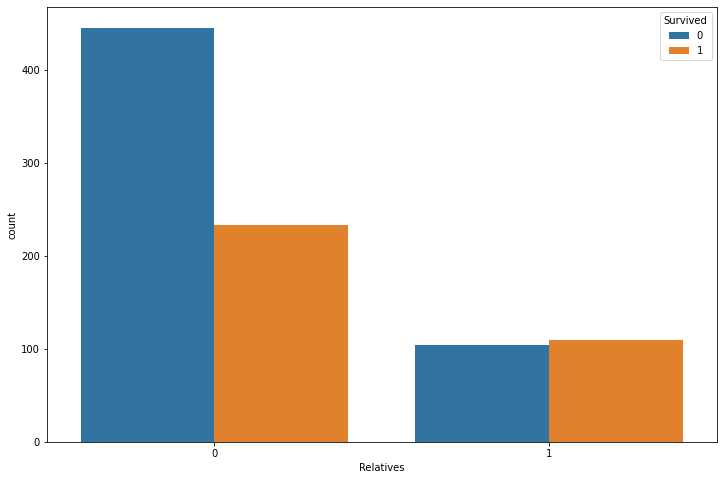

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x='Relatives', data=df, hue='Survived')

In [28]:
df['Relatives'].value_counts()

0    678
1    213
Name: Relatives, dtype: int64

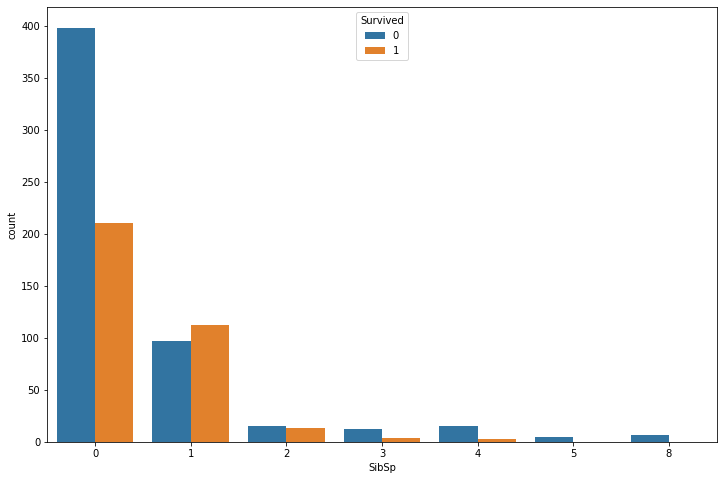

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x='SibSp', data=df, hue='Survived')

In [48]:
df['hasSib']=df['SibSp'].replace([2,3,4,5,8], 1)

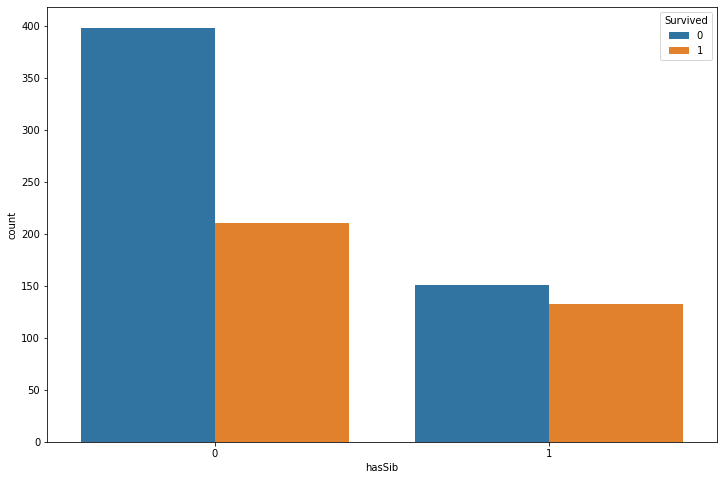

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasSib', data=df, hue='Survived')

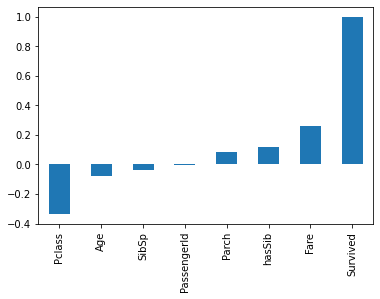

In [50]:
df.corr()['Survived'].sort_values().plot(kind='bar')

### Neural Networks

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


In [188]:
df = pd.read_csv('../input/titanic/train.csv')
df = preprocessing(df)

A total of 891 elements processed


In [189]:
X = df.drop('Survived', axis=1).values
# Label
y = df['Survived'].values


In [207]:
from sklearn.model_selection import train_test_split
#X = df.drop(['Survived'], axis=1) #complete here the input 
#y = df['Survived']#complete here the target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=11)


In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) # Fit scaler to the features
X_train = scaler.transform(X_train) # transform the features to a scaled version
X_test = scaler.transform(X_test)

In [269]:
scaler.fit(X)
X = scaler.transform(X)

In [270]:


# Basic model, adding layer one-by-one 
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2)) 
#model.add(Dense(4,activation='relu'))
#model.add(Dropout(0.2)) 
# Final output node for prediction
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [271]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', mode='min', 
                           verbose=1, patience=25)

model.fit(x=X, 
          y=y, 
          epochs=300,
          batch_size=4,
          verbose=0,
          callbacks=[early_stop]
          )



Epoch 00181: early stopping


In [272]:
losses = pd.DataFrame(model.history.history)
losses.iloc[-1]

loss    0.417942
Name: 180, dtype: float64

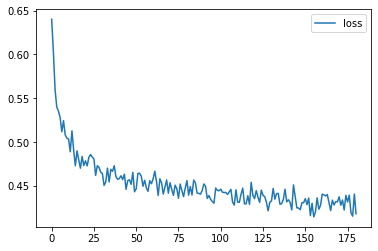

In [273]:
losses.plot()

In [254]:
test_predictions = model.predict_classes(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,test_predictions))
print('-----------------------------------------------------')
print(classification_report(y_test,test_predictions))

Confusion Matrix
[[107  11]
 [ 23  38]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       118
           1       0.78      0.62      0.69        61

    accuracy                           0.81       179
   macro avg       0.80      0.76      0.78       179
weighted avg       0.81      0.81      0.80       179



In [274]:
df_test = pd.read_csv('../input/titanic/test.csv')
test_data = preprocessing(df_test)
test_data = test_data.values
test_data = scaler.transform(test_data)
test_predict = model.predict_classes(test_data)

A total of 418 elements processed


In [275]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived':test_predict.reshape(418)})
output.to_csv('../output/my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
